In [1]:
import os
import pandas as pd
import math

# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

In [7]:
df_ave_data = pd.DataFrame()

path_pr = "".join([dir_path, "jaccard.csv"])
# read text file into pandas DataFrame
df_ave_data = pd.read_csv(path_pr, header=0, delim_whitespace=True)


### set the 'topic' column as index
df_ave_data.columns = ['topic','0', '1', '2', '3', '4','5']
df_ave_data.set_index('topic', inplace=True)
##df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)
print(df_ave_data)
df_ave_data = df_ave_data.drop(['1', '2', '3', '4','5'], axis=1)
#
df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'moeir_jaccard_evaluation_by_run_gen_1.csv')

df_ave_data

              0         1         2         3         4         5
topic                                                            
1      0.346855  0.716792  0.725105  0.768462  0.543084  0.706600
134    0.336276  0.451539  0.472391  0.687732  0.382633  0.458339
187    0.228528  0.515263  0.684421  0.409085  0.398118  0.420877
215    0.143320  0.682340  0.719622  0.778316  0.678298  0.845953
221    0.127407  0.696867  0.760049  0.421250  0.576844  0.839022
25     0.197130  0.694483  0.421985  0.603232  0.743356  0.691551
259    0.374494  0.400034  0.546938  0.494834  0.416090  0.485232
289    0.630813  0.547069  0.719089  0.535682  0.634138  0.711114
350    0.155862  0.604811  0.759868  0.455416  0.588666  0.669258
363    0.353438  0.452945  0.461988  0.384381  0.542908  0.518291
37     0.400200  0.585737  0.439045  0.580897  0.790157  0.566530
403    0.094442  0.583310  0.508710  0.262523  0.858395  0.474607
418    0.248189  0.477770  0.399670  0.715692  0.786541  0.430557
428    0.5

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.346855,0.336276,0.228528,0.14332,0.127407,0.19713,0.374494,0.630813,0.155862,0.353438,...,0.253393,0.185963,0.442774,0.714786,0.118624,0.25257,0.457071,0.246262,0.23822,0.228677


In [3]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.346855,0.336276,0.228528,0.14332,0.127407,0.19713,0.374494,0.630813,0.155862,0.353438,...,0.253393,0.185963,0.442774,0.714786,0.118624,0.25257,0.457071,0.246262,0.23822,0.228677
count,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.346855,1.0,NaN
134,0.336276,1.0,NaN
187,0.228528,1.0,NaN
215,0.143320,1.0,NaN
221,0.127407,1.0,NaN
25,0.197130,1.0,NaN
259,0.374494,1.0,NaN
289,0.630813,1.0,NaN
350,0.155862,1.0,NaN
363,0.353438,1.0,NaN


In [5]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_js': [stats_all_topics['mean'].mean()],                    
                    'count_js': [stats_all_topics['mean'].count()],
                    'std_js': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_js'] = ci95_lo
t['ci95_hi_js'] = ci95_hi


t.to_csv(save_path + 'moeir_jaccard_evaluation_stats_gen_1.csv')
t

,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0.300988,25,0.158259,0.23895,0.363025


Text(0.5, 0.98, 'Jaccard  - MOEIR ')

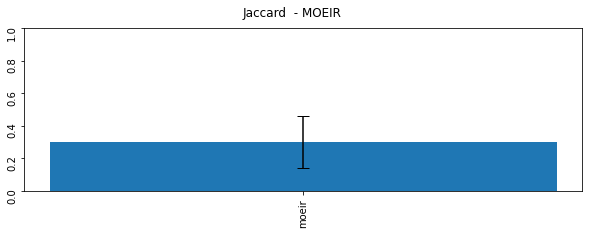

In [6]:
######### JACCARD
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_js'], yerr=t['std_js'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Jaccard  - MOEIR ')